## transforms方法
1. 剪裁——Drop

中心裁剪: `transforms.CenterCrop`<br>
随机裁剪: `transforms.RandomCrop`<br>
随机长宽比裁剪: `transforms.RndomResizedCrop`<br>
上下左右中心裁剪: `transforms.FiveCrop`<br>
上下左右中心裁剪后翻转: `transforms.TenCrop`

2. 翻转和旋转

依概率p水平翻转: `transforms.RandomHorizontalFlip(p=0.5)`<br>
依概率p垂直翻转: `transforms.RandomVerticalFlip(p=0.5)`<br>
随机旋转: `transforms.RandomRotation`

3. 图像变换

resize: `transforms.Resize`<br>
标准化: `transforms.Normalize`<br>
转为tensor并归一化至[0,1]: `transforms.ToTensor`<br>
填充: `transforms.Pad`<br>
修改亮度、对比度和饱和度: `transforms.ColorJitter`<br>
转灰度图: `transforms.Grayscale`<br>
线性变换: `transforms.LinearTransformation`<br>
仿射变换: `transforms.RandomAffine`<br>
依概率p转为灰度图: `transforms.RandomGrayscale`<br>
将数据转换为PILImage: `transforms.ToPILImage`

In [56]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
%matplotlib inline
# 中文乱码
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


print('torch version =', torch.__version__)
print('torchvision version =', torchvision.__version__)

torch version = 1.1.0
torchvision version = 0.3.0


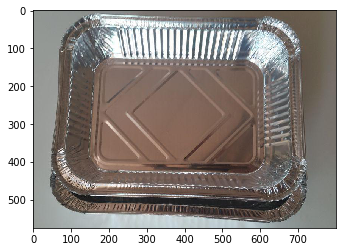

In [8]:
file_name = '../data/4_garbage-classify-for-pytorch/train/0/img_1.jpg'
input_image = Image.open(file_name)
ax = plt.imshow(input_image)

## PyTorch 数据预处理

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


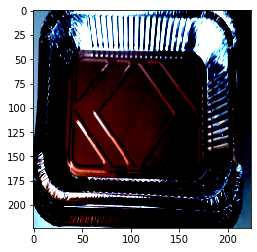

In [25]:
preprocess = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

input_tensor = preprocess(input_image)

input_tensor = input_tensor.permute(1, 2, 0) # 交换数据的维度
plt.imshow(input_tensor)

----

## 1.数据探测

In [29]:
import numpy as np
import os
import time
from os import walk


In [32]:
for (dirpath, dirname, filenames) in walk('../data/4_garbage-classify-for-pytorch/'):
    print('*' * 60)
    print('Director path =', dirpath)
    print('total examples =', len(filenames))
    print('filename examples =', filenames[:5])

************************************************************
Director path = ../data/4_garbage-classify-for-pytorch/
total examples = 2
filename examples = ['val.txt', 'train.txt']
************************************************************
Director path = ../data/4_garbage-classify-for-pytorch/train
total examples = 0
filename examples = []
************************************************************
Director path = ../data/4_garbage-classify-for-pytorch/train/2
total examples = 6889
filename examples = ['img_16034.jpg', 'img_11981.jpg', 'img_15593.jpg', 'img_13595.jpg', 'img_13947.jpg']
************************************************************
Director path = ../data/4_garbage-classify-for-pytorch/train/3
total examples = 925
filename examples = ['img_19473.jpg', 'img_18261.jpg', 'img_19471.jpg', 'img_18941.jpg', 'img_19199.jpg']
************************************************************
Director path = ../data/4_garbage-classify-for-pytorch/train/1
total examples = 2683
filena

In [36]:
import torch
from PIL import Image
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [37]:
# 定义预处理的方法

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
TRAIN = '../data/4_garbage-classify-for-pytorch/train'
VAL = '../data/4_garbage-classify-for-pytorch/val'

## 原始数据展示

In [52]:
train_data = datasets.ImageFolder(TRAIN)
val_data = datasets.ImageFolder(VAL)

train_data.imgs[:4]

[('../data/4_garbage-classify-for-pytorch/train/0/img_1.jpg', 0),
 ('../data/4_garbage-classify-for-pytorch/train/0/img_10.jpg', 0),
 ('../data/4_garbage-classify-for-pytorch/train/0/img_1001.jpg', 0),
 ('../data/4_garbage-classify-for-pytorch/train/0/img_1002.jpg', 0)]

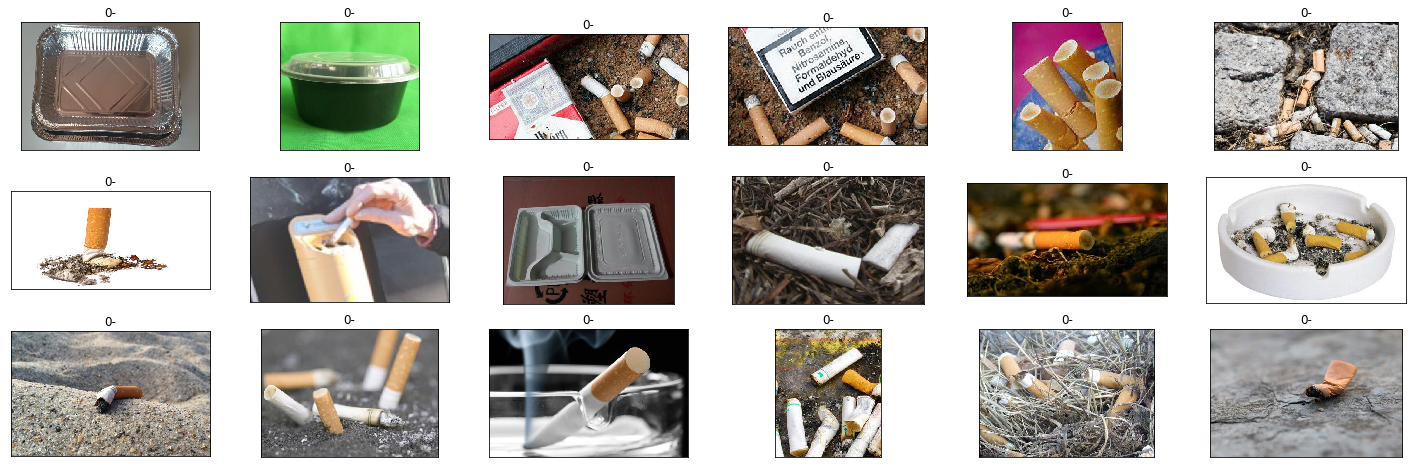

In [55]:
fig = plt.figure(figsize=(25, 8))
for idx, img in enumerate(train_data.imgs[:18]):
    
    ax = fig.add_subplot(3, 18/3, idx+1, xticks=[], yticks=[])
    file_name_path, target_idx = img[0], img[1]
    image = Image.open(file_name_path)
    plt.imshow(image)
    ax.set_title('{}-{}'.format(target_idx, ""))

## 数据预处理

In [63]:
transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# 数据格式转换
train_data = datasets.ImageFolder(TRAIN, transform=transforms)
val_data = datasets.ImageFolder(VAL, transform=transforms)

In [66]:
batch_size = 16
num_workers=1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                           num_workers=num_workers)

## 数据展示

In [70]:
images, labels = next(iter(train_loader))
print('image.shape =', images.shape)
print('label.shape =', labels.shape)

image.shape = torch.Size([16, 3, 224, 224])
label.shape = torch.Size([16])


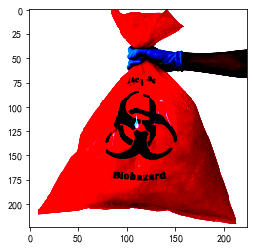

In [73]:
def imshow(img):
    image = img.permute(1, 2, 0) # 3,224,224 => 224,224,3
    image = torch.clamp(image, 0, 1)
    plt.imshow(image)
    
imshow(images[0])